<a href="https://colab.research.google.com/github/sphuang28/Tibaml_11103/blob/main/10_20_%E9%9B%BB%E8%85%A6%E5%BD%B1%E5%83%8F%E6%95%B8%E6%93%9A%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#形態學: 
# 處理雜訊 1.侵蝕(色彩值低的會侵蝕色彩值高的) 2膨脹(色彩值高的會侵蝕色彩值低的)
# 時機點: 1處理黑色雜訊 2.雜訊比主體少
# EX:處理黑色雜訊 先膨脹再侵蝕(圖像變數,方法,結構陣列)   結構陣列:np.ones(範圍大小)寬*高
# --->延伸綜合指令 結果圖像=cv2.morphologyEx(圖像變數,方法,結構陣列)
#                           方法1.cv2.MORPH_OPEN：先執行侵蝕後執行膨脹
#                           方法2.cv2.MORPH_CLOSE：先執行膨脹後執行侵蝕
#                           方法3.cv2.MORPH_GRADIENT：執行膨脹與侵蝕產生的變化差 -->描繪邊緣功能

import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

m1=cv2.imread("3-2.jpg",1)

#1.侵蝕(色彩值低的會侵蝕色彩值高的) 結果圖像=cv2.erode(圖像變數,結構陣列)
#m2=cv2.erode(m1,np.ones((2,2)))

#2.膨脹(色彩值高的會侵蝕色彩值低的) 結果圖像=cv2. dilate (圖像變數,結構陣列)
#m2=cv2.dilate(m1,np.ones((2,2)))

#3延伸 結果圖像=cv2.morphologyEx(圖像變數,方法,結構陣列)
m2=cv2.morphologyEx(m1,cv2.MORPH_GRADIENT, np.ones((4,4)))

cv2_imshow(m1)
cv2_imshow(m2)

3
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


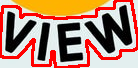

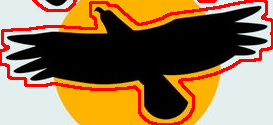

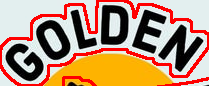

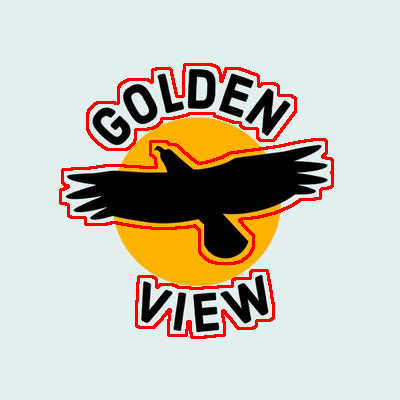

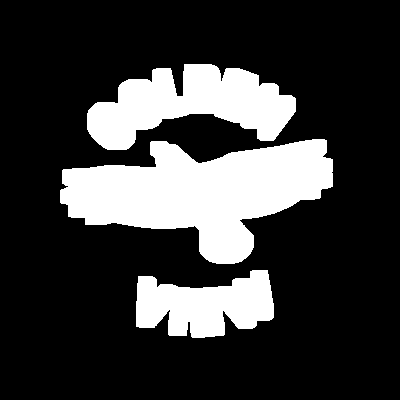

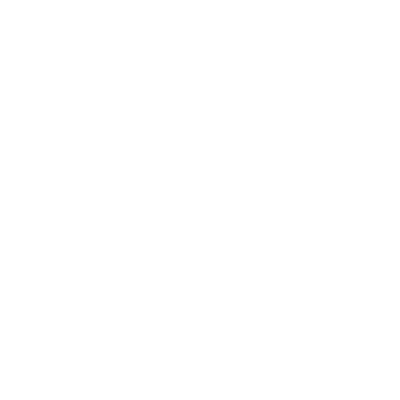

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

#色彩篩選: 
#判斷圖像裡的各項素是否在指定色彩範圍內：
# 結果圖像=cv2. inRange((圖像變數, 顏色下限, 顏色上限)
#1.圖像變數傳回一張與傳入變數相同大小的黑白圖像，在範圍內的像素會被設白色，否為則黑色
#2.顏色下限, 顏色上限 -->依照色彩空間的不同可傳進陣列或單一數值

m1=cv2.imread("3.jpg",1)

m2=cv2.inRange(m1,(0,0,0),(30,30,30))
m2=cv2.dilate(m2,np.ones((13,13)))
m3=np.full(m1.shape,(255,255,255),np.uint8)

#取得輪廓(需灰階)
#公式
#step:1 取資料

#輪廓點,輪廓階層資料=cv2.findContours()
#輪廓點=是個多維陣列，第一維指向不同的輪廓，第二維指向該輪廓對應的所有輪廓點
#輪廓階層資料=是個多維陣列，用來記錄各個輪廓的關係，第二維指向各個輪廓，第三維會有四個值，紀錄輪廓的索引（如果為-1代表沒有），分別代表：1.相鄰的下一個輪廓2.相鄰的上一個輪廓3.被其包覆的第一個輪廓4.包覆他的輪廓
#p,t=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

p,t=cv2.findContours(m2,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)

print(len(p))
print(t)
m3=np.full(m1.shape,(255,255,255),np.uint8)

#step2 畫圖(可以再任意圖型上繪製)
#a.劃出圖
#b.取出值

#a.
cv2.drawContours(m1,p,-1,(0,0,255),2)

#b.
for i in range(0,len(p),1):
  x, y, w, h, =cv2.boundingRect(p[i])
  #cv2.rectangle(m1,(x,y),(x+w,y+h), (0,0,255), 2)
  cv2_imshow(m1[y:y+h,x:x+w])

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)

In [ ]:
#作業: 把影片變成圖片 --> 

In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,033 kB/s)
Selecting previously unselect

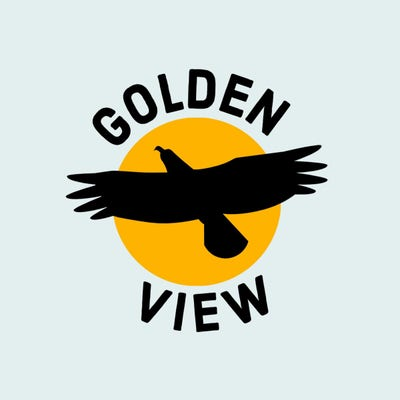

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
#import pytesseract as pt

#文字辨識

m1=cv2.imread("3.jpg",1)

cv2_imshow(m1)

In [ ]:
#===============Keyerror==========================解法

import os
os.kill(os.getpid(), 9)